# Final Semester Project
### By: Hunter Major

## Purpose

For my final project this semester, I decided to model a falling cube rotating in air, and making collisions with the ground that affects its rotation. I use realistic physics models such as the RK4 ODE solver, to determine the rotational and posital trajectories for each time step.

##  Models

In order to update the rotation and position of the cube in each time step, I used the RK4 ODE solver as follows:

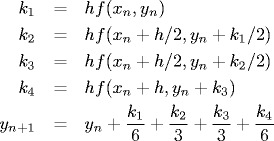

In [1]:
from IPython import display 
display.Image("./RK4.jpg")

My differential equations for the model are:

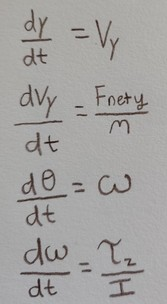

In [2]:
display.Image("./diffeq.jpg")

The model I used for a collision state is as follows:

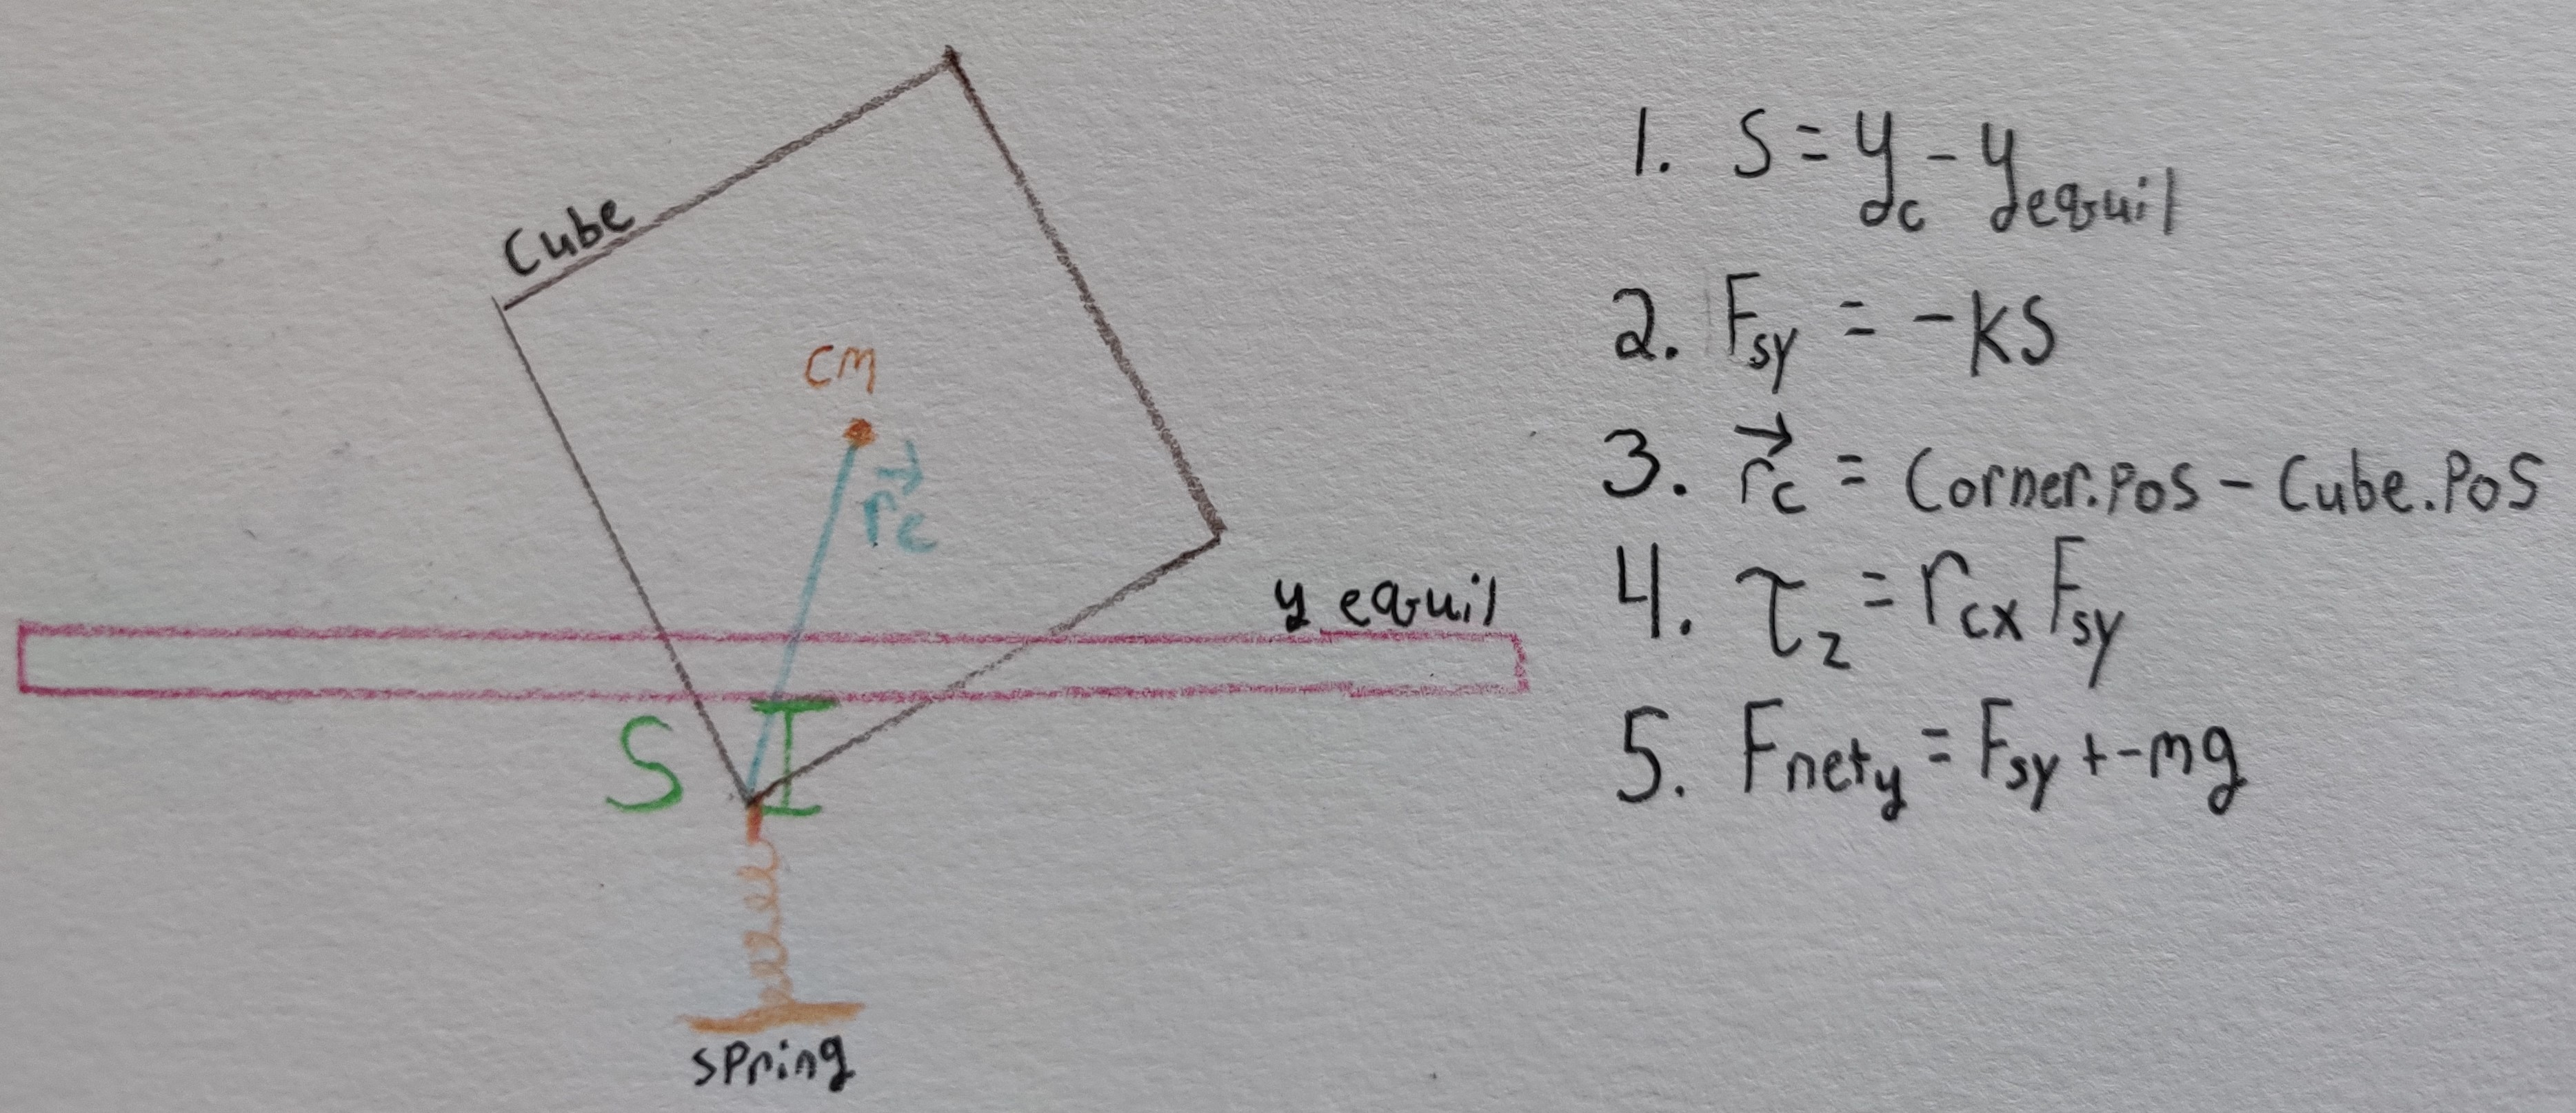

In [3]:
display.Image("./model.jpg")

## Assumptions

For the purpose of this model some assumptions had to be made. <br>
The first is that the cube is making elastic collisions, meaning there is no net loss in kinetic energy in the system as a result of the collision. <br>
Additionally, it would be better to think of the ground as a trampoline, because this model will use a spring to change the velocity of the cube, after a collision. <br>

## The Code

In [ ]:
from vpython import *
import numpy as np

In [ ]:
def update_corners(rp, a, theta):
    r1par = -a
    r1px = -rp*np.sin(theta)
    r1py = rp*np.cos(theta)
    r1p = vec(r1px, r1py, 0)
    r1 = r1par + r1p
    r1c = cube.pos + r1
    corner1.pos = r1c
    corner1.pos.z = cube.size.z/2
    
    r2par = a
    r2px = -rp*np.sin(theta)
    r2py = rp*np.cos(theta)
    r2p = vec(r2px, r2py, 0)
    r2 = r2par + r2p
    r2c = cube.pos + r2
    corner2.pos = r2c
    corner2.pos.z = cube.size.z/2
    
    r3par = a
    r3px = rp*np.sin(theta)
    r3py = -rp*np.cos(theta)
    r3p = vec(r3px, r3py, 0)
    r3 = r3par + r3p
    r3c = cube.pos + r3
    corner3.pos = r3c
    corner3.pos.z = cube.size.z/2
    
    r4par = -a
    r4px = rp*np.sin(theta)
    r4py = -rp*np.cos(theta)
    r4p = vec(r4px, r4py, 0)
    r4 = r4par + r4p
    r4c = cube.pos + r4
    corner4.pos = r4c
    corner4.pos.z = cube.size.z/2
    
def RK4(diffeq, y0, t, h):
    """ RK4 method for ODEs:
        Given y0 at t, returns y1 at t+h """
    k1 = h*diffeq(y0, t)                    # dy/dt at t
    k2 = h*diffeq(y0+0.5*k1, t + h/2.0)      # dy/dt at t+h/2
    k3 = h*diffeq(y0+0.5*k2, t + h/2.0)      # dy/dt at t+h/2
    k4 = h*diffeq(y0+k3, t + h)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0

def differential(d, tn): #return derivative of data = np.array(y, theta, vy, omega])
    der = np.zeros(len(data))
    
    der[0] = d[2]
    der[1] = d[3]
    der[2] = Fnety/m
    der[3] = torque.z/I
    
    return der
    

In [ ]:
scene=canvas()
scene.fov=0.1

#dependent variables 
y = 8
vy = 0
theta = 22.5*np.pi/180
omega = 0 #rad/s

t = 0 #independent variable
h = 0.0001
deltat = h #time step

# constants
g = 9.81
m = 0.4
k = 2000 #n/m
L = 2
H = 2
I = 1/12*m*(L**2+H**2)

# force and torque
Fnety = -m*g
torque = vec(0, 0, 0)

#3D objects
cube = box(pos=vector(0, y, 0), size=vector(L,H,H), color=color.white)
corner1 = sphere(pos=vec(0,0,0), size=vector(0.2,0.2,0.2), color=color.magenta)
corner2 = sphere(pos=vec(0,0,0), size=vector(0.2,0.2,0.2), color=color.blue)
corner3 = sphere(pos=vec(0,0,0), size=vector(0.2,0.2,0.2), color=color.yellow)
corner4 = sphere(pos=vec(0,0,0), size=vector(0.2,0.2,0.2), color=color.cyan)
ground = box(pos=vector(0,-0.05,0), size=vector(15,0.1,5), color=color.red) #top surface is at y=0

# energy
U = m*g*y #assume y=0 is the ground
Ktrans = 1/2*m*vy**2
Krot = 1/2*I*omega**2
K = Ktrans+Krot
E = U + K

#calculate corners
cube.rotate(axis=vec(0,0,1), angle=theta)
a = cube.axis/2 #axis of cube
rp = cube.size.y/2 #r_perp
update_corners(rp, a, theta)

# additional variables
done = False
temp = 0
coll = False
real_ground_loc = ground.pos.y + ground.size.y/2

#data array
data = np.array([y, theta, vy, omega])

#graph
gr = graph(title="energy")
g_Ktrans = gcurve(color=color.red, label="Ktrans")
g_Krot = gcurve(color=color.blue, label="Krot")
g_K = gcurve(color=color.magenta, label="K")
g_E = gcurve(color=color.black, label='E')

#rate
r = int(1/deltat)

scene.pause()

while cube.pos.y > real_ground_loc:
    rate(r)
        
    thetai = data[1] #theta before iteration
    data = RK4(differential, data, t, deltat) #iterate; solve ODE for one time step
    
    #update variables
    y = data[0]
    cube.pos.y = y #update position of cube
    theta = data[1] #new theta
    dtheta = theta - thetai #delta theta for rotation
    vy = data[2]
    omega = data[3]
    
    # energy
    U = m*g*y #assume y=0 is the ground
    Ktrans = 1/2*m*vy**2
    Krot = 1/2*I*omega**2
    K = Ktrans+Krot
    E = U + K
    
    # plot data
    g_Ktrans.plot(t,Ktrans)
    g_Krot.plot(t,Krot)
    g_K.plot(t,K)
    g_E.plot(t,E)
    
    cube.rotate(axis=vec(0,0,1), angle=dtheta) #rotate cube

    #check for collision
    a = cube.axis/2
    rp = cube.size.y/2
    
    update_corners(rp, a, theta)
    
    # after a collision, we need to reset our torque and Fnety varaibles
    if(coll == True and cube.pos.y >= real_ground_loc):
        deltat = h
        r = int(1/deltat)
        s = 0
        Fsy = -k*s
        torque = vec(0, 0, 0)
        Fnety = Fsy + -m*g
        coll = False
    
    if(corner1.pos.y <= real_ground_loc):
#       print("Hit the 1st corner")
        deltat = h/10
        r = int(1/deltat)
        s = corner1.pos.y - real_ground_loc
        Fsy = -k*s
        rc = corner1.pos - cube.pos
        Tz = rc.x*Fsy
        torque = vec(0, 0, Tz)
        Fnety = Fsy + -m*g
        coll = True
    if(corner2.pos.y <= real_ground_loc):
#       print("Hit the 2nd corner")
        deltat = h/10
        r = int(1/deltat)
        s = corner2.pos.y - real_ground_loc
        Fsy = -k*s
        rc = corner2.pos - cube.pos
        Tz = rc.x*Fsy
        torque = vec(0, 0, Tz)
        Fnety = Fsy + -m*g
        coll = True
    if(corner3.pos.y <= real_ground_loc):
#       print("Hit the 3rd corner")
        deltat = h/10
        r = int(1/deltat)
        s = corner3.pos.y - real_ground_loc
        Fsy = -k*s
        rc = corner3.pos - cube.pos
        Tz = rc.x*Fsy
        torque = vec(0, 0, Tz)
        Fnety = Fsy + -m*g
        coll = True
    if(corner4.pos.y <= real_ground_loc):
#       print("Hit the 4th corner")
        deltat = h/10
        r = int(1/deltat)
        s = corner4.pos.y - real_ground_loc
        Fsy = -k*s
        rc = corner4.pos - cube.pos
        Tz = rc.x*Fsy
        torque = vec(0, 0, Tz)
        Fnety = Fsy + -m*g
        coll = True
        
        
    t = t + deltat

# print("The time the cube took to hit the gorund is, ", t)
# print("Theta was equal to, ", theta)

## Validation

In order to validate the program, I tested dropping the cube with no rotation and having it collide with the ground directly on the corner. This will result in the cube continuing to travel straight up and straight down with no rotation, as expected. <br>

We can also observe the graph for validation. If you notice the total energy over a few collisions with the ground, there is practically no error with total energy. However, over many collisions with the ground, we will start to see total energy getting higher. This means that there is a small error, with physics, as total energy should not be continuously increasing.

## Conclusion

Overall, this model works great for modeling the trajectory of a falling cube/rectangle, with about 10 or less spring collisions with the ground. Although, after many collisions, the cube might start to experience strange behavior with its total energy. 

## References

I had great help on understanding the physics of this project from my Professor Dr. Titus. 